In [69]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from dotenv import find_dotenv, load_dotenv
from sqlalchemy import create_engine
import os

#copy from .env to use in notebook locally
gis_url = 
analysis_url = 
data_root = 

ANALYSIS_URL = analysis_url
GIS_URL = gis_url
ENGINE = create_engine(ANALYSIS_URL)
GIS_ENGINE = create_engine(GIS_URL)
DATA_ROOT = data_root

In [44]:
#define study area name so the SQL querey knows the name of the table
sa_name = "hunting_park"

#name the sql query
q_nonpdo_by_year = fr""" 
select count (crash_table), crash_table.crash_year
	from {sa_name}_crashes as crash_table 
	where not (crash_table.max_severity_level = '0')
	group by crash_table.crash_year; 
    """

In [45]:
#run the sql query and create dataframe from results
nonpdo_by_year = pd.read_sql(
    q_nonpdo_by_year, 
    con = ENGINE,
)

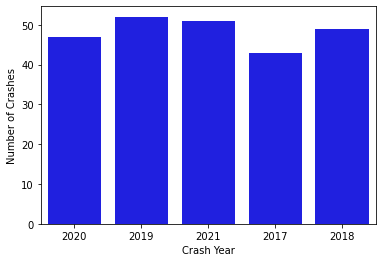

In [51]:
#configure the plot and view
fig = sns.barplot(data = nonpdo_by_year, x= "crash_year", y = "count",  color = "blue")
plt.xlabel("Crash Year")
plt.ylabel("Number of Crashes")
plt.show(fig)

In [52]:
#query that will result in a pie chart
q_ksi_by_type = fr"""select count (crash_table), crash_table.collision_type
	from {sa_name}_crashes as crash_table 
	where (crash_table.max_severity_level = '1' or crash_table.max_severity_level = '2')
	group by crash_table.collision_type;"""

ksi_by_type = pd.read_sql(
    q_ksi_by_type, 
    con = ENGINE,
)

In [62]:
#view the resulting dataframe
ksi_by_type

,count,collision_type
0,3,4
1,13,8
2,2,5
3,3,1


([<matplotlib.patches.Wedge at 0x139f2e99280>,
 [Text(0.9910657451172095, 0.47727213291294374, '4'),
  Text(-1.0511301225036391, 0.32423057469258654, '8'),
  Text(0.4018753196846571, -1.0239610478081453, '5'),
  Text(0.9910658568307873, -0.47727190093725136, '1')])

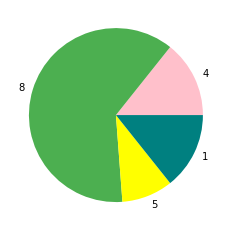

In [68]:
#define your pie chart colors if desired (just as an example; can also use hex codes)
pie_colors = ["pink", "#4CAF50", "yellow", "teal"]
#create the pie chart pointing the data and existing variables
plt.pie(ksi_by_type["count"], labels = ksi_by_type["collision_type"], colors = pie_colors)

In [ ]:
#i have no clue what the collision types numbers represent, but you can also define them here. they will show up in the same order as they are in the table
plt.pie(ksi_by_type["count"], labels = ksi_by_type["collision_type"], colors = pie_colors)

References for costimzing charts: https://www.w3schools.com/python/matplotlib_pie_charts.asp
https://matplotlib.org/stable/gallery/pie_and_polar_charts/bar_of_pie.html
https://www.geeksforgeeks.org/seaborn-barplot-method-in-python/
